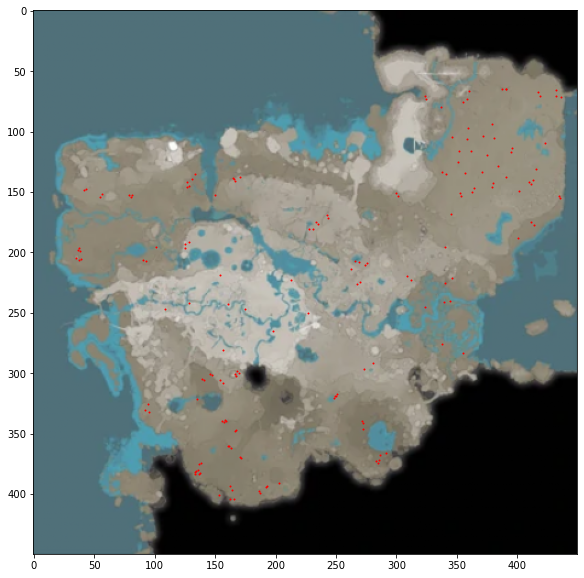

In [1]:
from satisfactory_planner.map_data import ResourceData
res_data = ResourceData()
nodes_df = res_data.get_raw()
res_data.show_on_map(nodes_df[nodes_df['name'].isin(['coal', 'iron-ore'])])


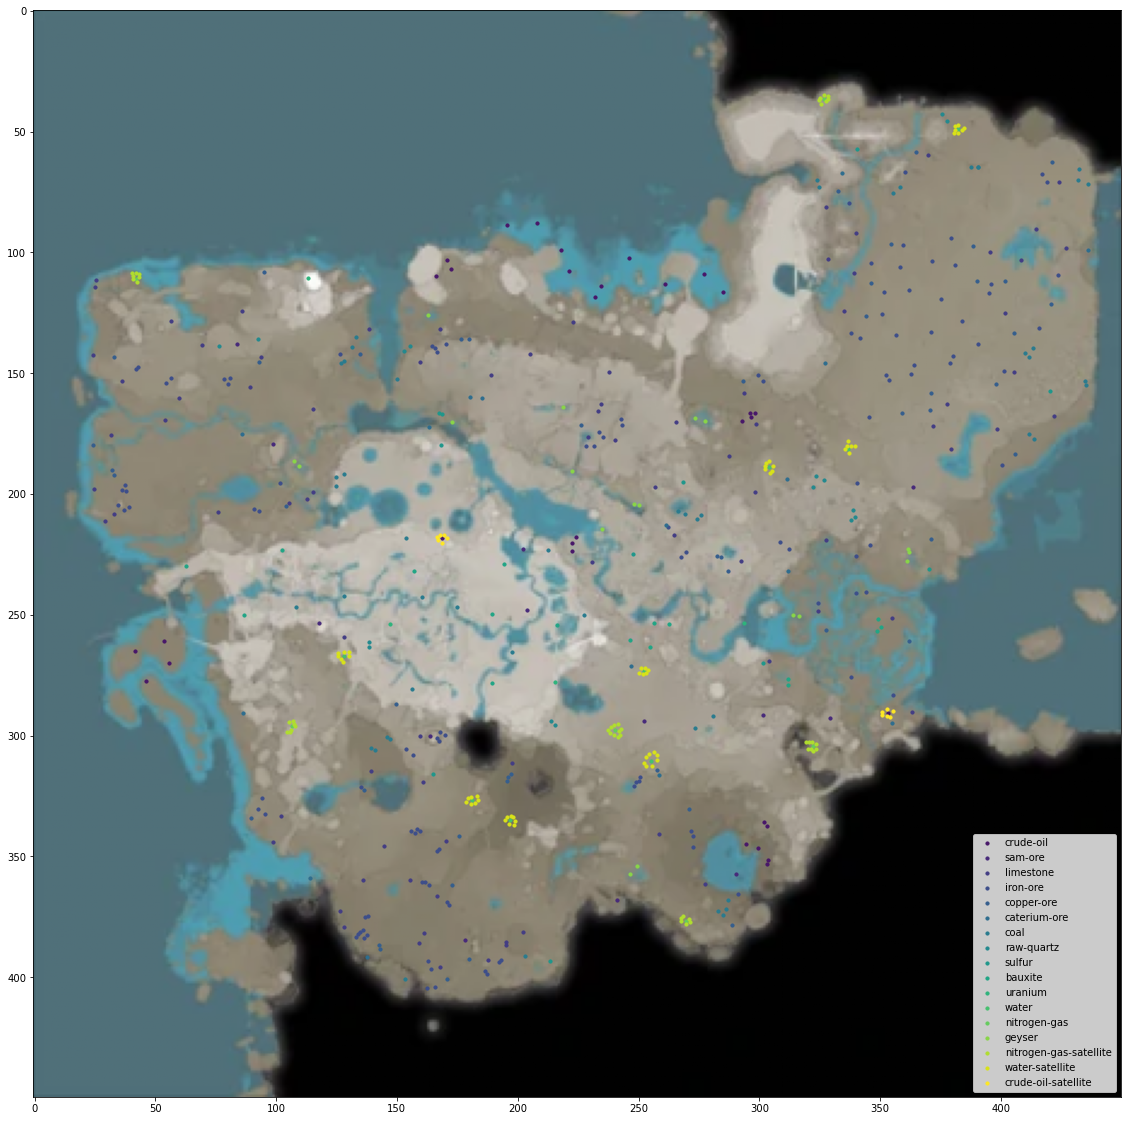

In [2]:
# Example 2
res_data.show_on_map(nodes_df, segment_key='name', figsize = [20, 20], s=10)

## Extraction and storage of materials

Our focus is on complete utilization of resources.
Every resource produced in the most efficient way possible.

We find the locations using the **quality** of the node as a heuristic.

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def get_kmeans(df, kmax = 12, debug = False, label = 'Unlabelled'):
    res = None
    c_max = 0
    c_ind = 0
    # dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
    for k in range(2, kmax+1 if kmax < len(df) else len(df)):
        kmeans = KMeans(n_clusters = k).fit(df)
        labels = kmeans.labels_
        sil_score = silhouette_score(df, labels, metric = 'euclidean')
        if debug:
            print('k : ', k, ', silhoutte score : ', sil_score)
        if c_max < sil_score : 
            c_max = sil_score
            res = kmeans
    return res

In [4]:
def get_cluster_points(resources, max_count=12, label=None):
    global nodes_df
    p_df = nodes_df[nodes_df['name'].isin(resources)]
    def apply_bias(x):
        if x['purity'] == 'Inpure':
            # print('Inpure')
            x['x'] *= 0.25
            x['y'] *= 0.25
        if x['purity'] == 'Normal':
            # print('Normal')
            x['x'] *= 0.5
            x['y'] *= 0.5
        if x['purity'] == 'Pure':
            # print('Pure')
            x['x'] *= 1
            x['y'] *= 1
        return x
    # p_df = p_df.transform(apply_bias, axis=1)
    res_df = p_df[['x', 'y', 'z']]
    del p_df
    if len(res_df) == 0:
        raise Exception("No resources found for list : ", resources)
    kmeans = get_kmeans(res_df, kmax=max_count)
    del res_df
    res_df = pandas.DataFrame(kmeans.cluster_centers_, columns=['x', 'y', 'z'])
    res_df['label'] = label
    del kmeans
    return res_df

# Example
res_data.show_on_map(get_cluster_points(['iron-ore'], label = 'iron-clusters'))

NameError: name 'pandas' is not defined

In [ ]:
# example 2
clusters = None
for resource in ['Iron Ore', 'Coal', 'Bauxite', 'Copper Ore', 'Crude Oil', 'Limestone', 'Uranium', 'Caterium Ore', 'Sulfur', 'Raw Quartz']:
    df = get_cluster_points([resource.lower().replace(' ','-')], label=resource.lower().replace(' ', '-') + '-cluster', max_count = 8)
    print(resource, len(df))
    if clusters is None:
        clusters = df
    else:
        clusters = clusters.append(df, ignore_index=True)
del df

In [ ]:
# Composites

# Steel
df = get_cluster_points(['coal', 'iron-ore'], label = 'steel-cluster', max_count = 8)
clusters = clusters.append(df, ignore_index=True)
res_data.show_on_map(clusters, s=20, figsize=[20, 20], segment_key='label')

In [ ]:
# res_data.show_on_map(clusters[clusters['label'] == 'iron-ore-cluster'])

In [ ]:
# kmeans = get_kmeans(clusters[['x', 'y', 'z']])
# res_df = pandas.DataFrame(kmeans.cluster_centers_, columns=['x', 'y', 'z'])
# res_df['label'] = "Hyper Factories"
# res_data.show_on_map(res_df, s=50)

In [ ]:
materials = ['bauxite', 'caterium-ore', 'copper-ore', 'iron-ore', 'limestone', 'raw-quartz', 'crude-oil', 'nitrogen-gas', 'water']
res_df = get_cluster_points(materials, label='pressure-conversion-cube-cluster', max_count= 8)
matter_nodes = nodes_df[nodes_df['name'].isin(materials)]
matter_nodes = matter_nodes.rename(columns={'name':'label'})
res_df = res_df.append(matter_nodes)
res_data.show_on_map(res_df, segment_key='label', figsize = [20, 20], s=10)
# nodes_df[nodes_df['name'].isin(materials)]
# res_df

In [ ]:
res_data.show_on_map(res_df[res_df['label'].isin(['crude-oil', 'pressure-conversion-cube-cluster'])], segment_key='label', figsize = [20, 20], s=10)